In [1]:
#import libraries
import os
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from d2l import torch as d2l
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from torch import nn
from torch.nn import functional as F


In [2]:
admission_df = pd.read_csv("/Users/selomcaleb/Desktop/Level 400 Second Semester/Undergraduate Thesis II/combined_data.csv")

# print the first five rows in the dataset
admission_df.tail(50)

Major       Major Sum Gender  \
3234                       [B.Sc.] Computer Science  Arts & Science      F   
3235                       [B.Sc.] Computer Science  Arts & Science      F   
3236                       [B.Sc.] Computer Science  Arts & Science      M   
3237                [B.Sc.] Business Administration  Arts & Science      F   
3238  [B.Sc.] Electrical and Electronic Engineering     Engineering      M   
3239                [B.Sc.] Business Administration  Arts & Science      F   
3240         [B.Sc.] Management Information Systems  Arts & Science      F   
3241                       [B.Sc.] Computer Science  Arts & Science      M   
3242                   [B.Sc.] Computer Engineering     Engineering      M   
3243                   [B.Sc.] Computer Engineering     Engineering      F   
3244                       [B.Sc.] Computer Science  Arts & Science      M   
3245                       [B.Sc.] Computer Science  Arts & Science      F   
3246                   [B.Sc.] Computer Engineering     Engineering      M   
3247  [B.Sc.] Electrical and Electronic Engineering     Engineering      M   
3248  [B.Sc.] Electrical and Electronic Engineering     Engineering      M   
3249                [B.Sc.] Business Administration  Arts & Science      F   
3250  [B.Sc.] Electrical and Electronic Engineering     Engineering      M   
3251                       [B.Sc.] Computer Science  Arts & Science      F   
3252  [B.Sc.] Electrical and Electronic Engineering     Engineering      F   
3253                       [B.Sc.] Computer Science  Arts & Science      F   
3254  [B.Sc.] Electrical and Electronic Engineering     Engineering      F   
3255         [B.Sc.] Management Information Systems  Arts & Science      F   
3256                [B.Sc.] Business Administration  Arts & Science      M   
3257                       [B.Sc.] Computer Science  Arts & Science      F   
3258                       [B.Sc.] Computer Science  Arts & Science      F   
3259                [B.Sc.] Business Administration  Arts & Science      M   
3260                 [B.Sc.] Mechanical Engineering     Engineering      F   
3261                   [B.Sc.] Computer Engineering     Engineering      F   
3262                [B.Sc.] Business Administration  Arts & Science      F   
3263                       [B.Sc.] Computer Science  Arts & Science      M   
3264  [B.Sc.] Electrical and Electronic Engineering     Engineering      M   
3265  [B.Sc.] Electrical and Electronic Engineering     Engineering      M   
3266                       [B.Sc.] Computer Science  Arts & Science      M   
3267                [B.Sc.] Business Administration  Arts & Science      M   
3268                [B.Sc.] Business Administration  Arts & Science      F   
3269                 [B.Sc.] Mechanical Engineering     Engineering      F   
3270                [B.Sc.] Business Administration  Arts & Science      M   
3271                       [B.Sc.] Computer Science  Arts & Science      M   
3272         [B.Sc.] Management Information Systems  Arts & Science      M   
3273                [B.Sc.] Business Administration  Arts & Science      M   
3274                   [B.Sc.] Computer Engineering     Engineering      M   
3275                       [B.Sc.] Computer Science  Arts & Science      F   
3276  [B.Sc.] Electrical and Electronic Engineering     Engineering      M   
3277  [B.Sc.] Electrical and Electronic Engineering     Engineering      F   
3278                [B.Sc.] Business Administration  Arts & Science      M   
3279                       [B.Sc.] Computer Science  Arts & Science      M   
3280                       [B.Sc.] Computer Science  Arts & Science      M   
3281                [B.Sc.] Business Administration  Arts & Science      M   
3282                       [B.Sc.] Computer Science  Arts & Science      F   
3283                       [B.Sc.] Computer Science  Arts & Science      F   

         Citizen                       Grades:Type of Exam FA Reque

In [3]:
unique_values = admission_df['Gender'].value_counts()
unique_values

Gender
M    1977
F    1307
Name: count, dtype: int64

In [4]:
status_mapping = {
    'Admit': 'Admit',
    'Admit ':'Admit',
    'No Aid': 'Admit',
    'Deny': 'Deny',
    'deny': 'Deny',
    'Deny ':'Deny',
    'Disqualified': 'Deny',
    'Not Competitve': 'Deny',
    'flight risk': 'Deny',
    'Withdrawn': 'Deny',
    'Withdrawn ':'Deny',
    'Waitlist': 'Waitlist',
    'waitlist': 'Waitlist',
    'Wailtlist': 'Waitlist',
    'Waitlist ':'Waitlist'
}

# Apply the mapping to the DataFrame
admission_df['Admit Status'] = admission_df['Admit Status'].map(status_mapping)


admission_df.head(50)

Major    Major Sum Gender  \
0                  [B.Sc.] Mechanical Engineering  Engineering      F   
1                    [B.Sc.] Computer Engineering  Engineering      M   
2                  [B.Sc.] Mechanical Engineering  Engineering      F   
3                    [B.Sc.] Computer Engineering  Engineering      M   
4                    [B.Sc.] Computer Engineering  Engineering      M   
5   [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
6                    [B.Sc.] Computer Engineering  Engineering      M   
7                  [B.Sc.] Mechanical Engineering  Engineering      F   
8                  [B.Sc.] Mechanical Engineering  Engineering      M   
9                    [B.Sc.] Computer Engineering  Engineering      F   
10  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
11                 [B.Sc.] Mechanical Engineering  Engineering      F   
12                 [B.Sc.] Mechanical Engineering  Engineering      M   
13  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
14  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
15                 [B.Sc.] Mechanical Engineering  Engineering      M   
16  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
17  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
18                   [B.Sc.] Computer Engineering  Engineering      M   
19  [B.Sc.] Electrical and Electronic Engineering  Engineering      F   
20                 [B.Sc.] Mechanical Engineering  Engineering      M   
21  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
22  [B.Sc.] Electrical and Electronic Engineering  Engineering      F   
23  [B.Sc.] Electrical and Electronic Engineering  Engineering      F   
24                 [B.Sc.] Mechanical Engineering  Engineering      M   
25                   [B.Sc.] Computer Engineering  Engineering      M   
26                   [B.Sc.] Computer Engineering  Engineering      M   
27  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
28                 [B.Sc.] Mechanical Engineering  Engineering      F   
29  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
30                 [B.Sc.] Mechanical Engineering  Engineering      F   
31  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
32                 [B.Sc.] Mechanical Engineering  Engineering      F   
33  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
34  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
35                 [B.Sc.] Mechanical Engineering  Engineering      F   
36  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
37                   [B.Sc.] Computer Engineering  Engineering      M   
38                 [B.Sc.] Mechanical Engineering  Engineering      F   
39                 [B.Sc.] Mechanical Engineering  Engineering      M   
40  [B.Sc.] Electrical and Electronic Engineering  Engineering      F   
41                 [B.Sc.] Mechanical Engineering  Engineering      F   
42                   [B.Sc.] Computer Engineering  Engineering      F   
43  [B.Sc.] Electrical and Electronic Engineering  Engineering      F   
44                   [B.Sc.] Computer Engineering  Engineering      M   
45  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
46                 [B.Sc.] Mechanical Engineering  Engineering      M   
47  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
48  [B.Sc.] Electrical and Electronic Engineering  Engineering      F   
49  [B.Sc.] Electrical and Electronic Engineering  Engineering      F   

             Citizen                       Grades:Type of Exam FA Request  \
0        ZW Zimbabwe                       High School Diploma        Yes   
1        CM Cameroon                           IGCSE 'A' Level        Yes   
2          RW Rwanda                       High School Diploma        Yes   
3           

In [5]:
# creating instances of label encoder for the categorical features: Major, Gender, Citizen, Grades: Type of exam, Admit status
major_encoder = LabelEncoder()
gender_encoder = LabelEncoder()
citizen_encoder = LabelEncoder()
grades_encoder = LabelEncoder()
admit_encoder = LabelEncoder()

text_columns = ["Major", "Major Sum", "Gender", "Citizen", "Grades:Type of Exam","Admit Status"]

for col in text_columns:
    admission_df[col] = admission_df[col].str.lower().str.strip()

def map_grades_type(exam_type):
    exam_type = exam_type.lower()  # Convert to lowercase for consistency

    if 'wassce' in exam_type:
        return 'WASSCE'
    elif 'igcse' in exam_type:
        return 'IGCSE'
    elif 'international baccalaureate (ib) diploma' in exam_type:
        return 'IB Diploma'
    elif 'high school diploma' in exam_type:
        return 'High School Diploma'
    elif 'other official exam' in exam_type:
        return 'Other Official Exam'
    else:
        return exam_type  # Leave unchanged if it doesn't match any category


# Apply the mapping function to the 'Grades: Type of Exam' column
admission_df['Grades:Type of Exam'] = admission_df['Grades:Type of Exam'].apply(map_grades_type)

admission_df['major_encoded'] = major_encoder.fit_transform(admission_df['Major'])
admission_df['gender_encoded'] = gender_encoder.fit_transform(admission_df['Gender'])
admission_df['citizen_encoded'] = citizen_encoder.fit_transform(admission_df['Citizen'])
admission_df['grades_encoded'] = grades_encoder.fit_transform(admission_df['Grades:Type of Exam'])
admission_df['admit_encoded'] = admit_encoder.fit_transform(admission_df['Admit Status'])

# Getting the mappings
major_mapping = dict(zip(major_encoder.classes_, major_encoder.transform(major_encoder.classes_)))
gender_mapping = dict(zip(gender_encoder.classes_, gender_encoder.transform(gender_encoder.classes_)))
citizen_mapping = dict(zip(citizen_encoder.classes_, citizen_encoder.transform(citizen_encoder.classes_)))
grades_mapping = dict(zip(grades_encoder.classes_, grades_encoder.transform(grades_encoder.classes_)))
admit_mapping = dict(zip(admit_encoder.classes_, admit_encoder.transform(admit_encoder.classes_)))



In [6]:
admission_df

Major       Major Sum Gender      Citizen  \
0      [b.sc.] mechanical engineering     engineering      f  zw zimbabwe   
1        [b.sc.] computer engineering     engineering      m  cm cameroon   
2      [b.sc.] mechanical engineering     engineering      f    rw rwanda   
3        [b.sc.] computer engineering     engineering      m     gh ghana   
4        [b.sc.] computer engineering     engineering      m     gh ghana   
...                               ...             ...    ...          ...   
3279         [b.sc.] computer science  arts & science      m     gh ghana   
3280         [b.sc.] computer science  arts & science      m     gh ghana   
3281  [b.sc.] business administration  arts & science      m     gh ghana   
3282         [b.sc.] computer science  arts & science      f     gh ghana   
3283         [b.sc.] computer science  arts & science      f     gh ghana   

      Grades:Type of Exam FA Request  Interview(30)  Extracurricular(10)  \
0     High School Diploma        Yes           29.0                  9.0   
1                   IGCSE        Yes           28.5                 10.0   
2     High School Diploma        Yes           26.0                  9.0   
3                  WASSCE        Yes           28.5                  6.0   
4                   IGCSE         No           27.0                  8.0   
...                   ...        ...            ...                  ...   
3279               WASSCE         No            0.0                  0.0   
3280               WASSCE        Yes            0.0                  0.0   
3281               WASSCE        Yes            0.0                  0.0   
3282               WASSCE         No           24.5                  8.0   
3283               WASSCE         No           26.0                  5.0   

      Essay(10)  Transcript(10)  Exam(30)  Core Math(10)  Physics(10)  \
0           8.5            10.0        30           10.0           10   
1           8.0             8.5        30           10.0           10   
2           7.5            10.0        30           10.0           10   
3           7.5            10.0        30           10.0           10   
4           8.5             7.5        30           10.0           10   
...         ...             ...       ...            ...          ...   
3279        0.0             0.0         0            0.0            0   
3280        0.0             0.0         0            0.0            0   
3281        0.0             0.0         0            0.0            0   
3282        7.0             8.5        15            6.0            0   
3283        6.0             5.0        10            8.0            0   

      Elective/Further Math(10) Admit Status  major_encoded  gender_encoded  \
0                            10        admit              5               0   
1                            10        admit              1               1   
2                            10        admit              5               0   
3                            10         deny              1               1   
4                            10        admit              1               1   
...                         ...          ...            ...             ...   
3279                          0         deny              2               1   
3280                          0         deny              2               1   
3281                          0         deny              0               1   
3282                          0         deny              2               0   
3283                          0        admit              2               0   

      citizen_encoded  grades_encoded  admit_encoded  
0                  33               0              0  
1                   5               2              0  
2                  22               0              0  
3                  10               4              1  
4                  10               2              0  
...               ...             ... 

In [7]:
ohe = OneHotEncoder()
features = ['Major', 'Gender','Citizen','Grades:Type of Exam','Admit Status']
transformed = ohe.fit_transform(admission_df[features])

# Convert the one-hot encoded array to a Dataframe
encoded_df = pd.DataFrame(transformed.toarray(), columns=ohe.get_feature_names_out(features))

# Copncatenate the one-hot encoded DataFrame with the original DataFrame
admission_df = pd.concat([admission_df, encoded_df], axis=1)

# Printing the first five rows
admission_df.head()

Major    Major Sum Gender      Citizen  \
0  [b.sc.] mechanical engineering  engineering      f  zw zimbabwe   
1    [b.sc.] computer engineering  engineering      m  cm cameroon   
2  [b.sc.] mechanical engineering  engineering      f    rw rwanda   
3    [b.sc.] computer engineering  engineering      m     gh ghana   
4    [b.sc.] computer engineering  engineering      m     gh ghana   

   Grades:Type of Exam FA Request  Interview(30)  Extracurricular(10)  \
0  High School Diploma        Yes           29.0                  9.0   
1                IGCSE        Yes           28.5                 10.0   
2  High School Diploma        Yes           26.0                  9.0   
3               WASSCE        Yes           28.5                  6.0   
4                IGCSE         No           27.0                  8.0   

   Essay(10)  Transcript(10)  ...  Citizen_zw zimbabwe  \
0        8.5            10.0  ...                  1.0   
1        8.0             8.5  ...                  0.0   
2        7.5            10.0  ...                  0.0   
3        7.5            10.0  ...                  0.0   
4        8.5             7.5  ...                  0.0   

   Grades:Type of Exam_High School Diploma  Grades:Type of Exam_IB Diploma  \
0                                      1.0                             0.0   
1                                      0.0                             0.0   
2                                      1.0                             0.0   
3                                      0.0                             0.0   
4                                      0.0                             0.0   

   Grades:Type of Exam_IGCSE Grades:Type of Exam_Other Official Exam  \
0                        0.0                                     0.0   
1                        1.0                                     0.0   
2                        0.0                                     0.0   
3                        0.0                                     0.0   
4                        1.0                                     0.0   

   Grades:Type of Exam_WASSCE  Grades:Type of Exam_a level  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3                         1.0                          0.0   
4                         0.0                          0.0   

   Admit Status_admit  Admit Status_deny  Admit Status_waitlist  
0                 1.0                0.0                    0.0  
1                 1.0                0.0                    0.0  
2                 1.0                0.0                    0.0  
3                 0.0                1.0                    0.0  
4                 1.0                0.0                    0.0  

[5 rows x 71 columns]

In [8]:
list(admission_df.columns)

['Major',
 'Major Sum',
 'Gender',
 'Citizen',
 'Grades:Type of Exam',
 'FA Request',
 'Interview(30)',
 'Extracurricular(10)',
 'Essay(10)',
 'Transcript(10)',
 'Exam(30)',
 'Core Math(10)',
 'Physics(10)',
 'Elective/Further Math(10)',
 'Admit Status',
 'major_encoded',
 'gender_encoded',
 'citizen_encoded',
 'grades_encoded',
 'admit_encoded',
 'Major_[b.sc.] business administration',
 'Major_[b.sc.] computer engineering',
 'Major_[b.sc.] computer science',
 'Major_[b.sc.] electrical and electronic engineering',
 'Major_[b.sc.] management information systems',
 'Major_[b.sc.] mechanical engineering',
 'Gender_f',
 'Gender_m',
 'Citizen_bf burkina faso',
 'Citizen_bi burundi',
 'Citizen_bj benin',
 'Citizen_cd congo - kinshasa',
 'Citizen_ci côte d’ivoire',
 'Citizen_cm cameroon',
 'Citizen_de germany',
 'Citizen_es spain',
 'Citizen_et ethiopia',
 'Citizen_gb united kingdom',
 'Citizen_gh ghana',
 'Citizen_gm the gambia',
 'Citizen_jm jamaica',
 'Citizen_ke kenya',
 'Citizen_lr libe

In [9]:
# Splitting the dataset into training and testing sets
train_set, test_set = train_test_split(admission_df,test_size=0.1, random_state=42)

# Resetting the index of both training set and testing set to drop old columns and modify the dataframe in place.
train_set.reset_index(drop=True, inplace=True)
test_set.reset_index(drop=True, inplace=True)


scaler = StandardScaler()
numerical_features = ['Interview(30)', 'Extracurricular(10)', 'Essay(10)', 'Transcript(10)', 'Exam(30)', 'Core Math(10)', 'Physics(10)', 'Elective/Further Math(10)']
train_set[numerical_features] = scaler.fit_transform(train_set[numerical_features])
test_set[numerical_features] = scaler.transform(test_set[numerical_features])


# Obtaining the training features
features1 = train_set[['Interview(30)','Extracurricular(10)','Essay(10)','Transcript(10)','Exam(30)','Core Math(10)','Physics(10)','Elective/Further Math(10)','Major_[b.sc.] business administration',
 'Major_[b.sc.] computer engineering','Major_[b.sc.] computer science','Major_[b.sc.] electrical and electronic engineering','Major_[b.sc.] management information systems','Major_[b.sc.] mechanical engineering',
 'Gender_f','Gender_m','Citizen_bf burkina faso','Citizen_bi burundi','Citizen_bj benin','Citizen_cd congo - kinshasa','Citizen_ci côte d’ivoire','Citizen_cm cameroon',
 'Citizen_de germany','Citizen_es spain','Citizen_et ethiopia','Citizen_gb united kingdom','Citizen_gh ghana','Citizen_gm the gambia',
 'Citizen_jm jamaica','Citizen_ke kenya','Citizen_lr liberia','Citizen_ls lesotho','Citizen_ly libya','Citizen_mw malawi','Citizen_mz mozambique','Citizen_ne niger',
 'Citizen_ng nigeria','Citizen_no norway','Citizen_rw rwanda','Citizen_sd sudan','Citizen_sl sierra leone','Citizen_so somalia','Citizen_ss south sudan','Citizen_sz swaziland',
 'Citizen_tg togo','Citizen_tz tanzania','Citizen_ug uganda','Citizen_us united states', 'Citizen_zm zambia', 'Citizen_zw zimbabwe', 'Grades:Type of Exam_High School Diploma', 'Grades:Type of Exam_IB Diploma',
 'Grades:Type of Exam_IGCSE','Grades:Type of Exam_Other Official Exam', 'Grades:Type of Exam_WASSCE', 'Grades:Type of Exam_a level']]

#Obtaining the binary columns of the dataset as the target
label = train_set[['Admit Status_admit','Admit Status_deny','Admit Status_waitlist']]

# Obtaining the testing features
test_features1 = test_set[['Interview(30)','Extracurricular(10)','Essay(10)','Transcript(10)','Exam(30)','Core Math(10)','Physics(10)','Elective/Further Math(10)','Major_[b.sc.] business administration',
 'Major_[b.sc.] computer engineering','Major_[b.sc.] computer science','Major_[b.sc.] electrical and electronic engineering','Major_[b.sc.] management information systems','Major_[b.sc.] mechanical engineering',
 'Gender_f','Gender_m','Citizen_bf burkina faso','Citizen_bi burundi','Citizen_bj benin','Citizen_cd congo - kinshasa','Citizen_ci côte d’ivoire','Citizen_cm cameroon',
 'Citizen_de germany','Citizen_es spain','Citizen_et ethiopia','Citizen_gb united kingdom','Citizen_gh ghana','Citizen_gm the gambia',
 'Citizen_jm jamaica','Citizen_ke kenya','Citizen_lr liberia','Citizen_ls lesotho','Citizen_ly libya','Citizen_mw malawi','Citizen_mz mozambique','Citizen_ne niger',
 'Citizen_ng nigeria','Citizen_no norway','Citizen_rw rwanda','Citizen_sd sudan','Citizen_sl sierra leone','Citizen_so somalia','Citizen_ss south sudan','Citizen_sz swaziland',
 'Citizen_tg togo','Citizen_tz tanzania','Citizen_ug uganda','Citizen_us united states', 'Citizen_zm zambia', 'Citizen_zw zimbabwe', 'Grades:Type of Exam_High School Diploma', 'Grades:Type of Exam_IB Diploma',
 'Grades:Type of Exam_IGCSE','Grades:Type of Exam_Other Official Exam', 'Grades:Type of Exam_WASSCE', 'Grades:Type of Exam_a level']]


test_label = test_set['admit_encoded']

# Obtaining the training set features as a tensor
X_tensor1 = torch.tensor(features1.values,dtype=torch.float32)

# Obtaining the training set target as tensors
y_tensor1 = torch.tensor(label.values, dtype=torch.long)

# Obtaining the testing set features as a tensor
X_test_tensor1 = torch.tensor(test_features1.values, dtype=torch.float32)

# Obtaining the testing set targets as a tensor
y_test_tensor1 = torch.tensor(test_label.values, dtype=torch.float32)

print(train_set)

                                Major         Major Sum Gender       Citizen  \
0     [b.sc.] business administration  arts and science      m      gh ghana   
1     [b.sc.] business administration  arts and science      m      gh ghana   
2        [b.sc.] computer engineering       engineering      m      gh ghana   
3        [b.sc.] computer engineering       engineering      m      gh ghana   
4     [b.sc.] business administration    arts & science      f      gh ghana   
...                               ...               ...    ...           ...   
2950  [b.sc.] business administration  arts and science      m      gh ghana   
2951  [b.sc.] business administration  arts and science      m      gh ghana   
2952         [b.sc.] computer science  arts and science      m  sz swaziland   
2953  [b.sc.] business administration  arts and science      f      gh ghana   
2954   [b.sc.] mechanical engineering       engineering      f      gh ghana   

      Grades:Type of Exam FA Request  I

## Defining the Softmax Model

In [10]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                              requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)
        
    def parameters(self):
        return [self.W, self.b]

In [11]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    return softmax(torch.matmul(X, self.W) + self.b)

In [12]:
# The softmax function to return the predicted probabilities.
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition

# Cross entropy function to compute the cross-entropy loss for each sample in the batch, and returns the average loss across the batch
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

In [13]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

In [14]:
@d2l.add_to_class(SoftmaxRegressionScratch) #@save
# The accuracy function to compute the accuracy of our model
def accuracy(self, Y_hat, Y, averaged=True):
    """Compute the number of correct predictions."""
    preds = Y_hat.argmax(axis=1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

## Generating the Dataset

In [15]:
class AdmissionData(d2l.DataModule): #@save
    """Used Cars data for linear regression"""
    def __init__(self,features, target,num_train=2660, num_val=295, batch_size=16):
        super().__init__()
        self.save_hyperparameters()
        self.X = features
        self.y = target

    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader((self.X, self.y), train, i)

    def text_labels(self, indices):
        """Return text labels."""
        labels = ['admit','deny','waitlisted']
        return [labels[int(i)] for i in indices]

## Training the Model

In [16]:
# converting the logits in y_tensor1 into predicted class indices, to obtain a single class prediction per sample based on highest probability.
y_train1_categories = torch.argmax(y_tensor1, axis=1)


In [17]:
# Performing the training of the model
data = AdmissionData(X_tensor1,y_train1_categories)
model = SoftmaxRegressionScratch(num_inputs=56, num_outputs=3, lr=0.001)
trainer = d2l.Trainer(max_epochs=50)
trainer.fit(model, data)

In [18]:
# Setting the model to evaluation mode
model.eval()  
with torch.no_grad():
    test_preds = model(X_test_tensor1) 

# Transforming logits to discrete class labels
test_preds = torch.argmax(test_preds, axis=1)

# Convert predictions tensor to NumPy array and reshape it
predictions_np = test_preds.detach().numpy().reshape(-1)

# Obtaining the miles and year from the testing set
original_features = test_set[['Major','Gender','Citizen','Grades:Type of Exam', 'Interview(30)','Extracurricular(10)','Essay(10)','Transcript(10)','Exam(30)','Core Math(10)',
 'Physics(10)','Elective/Further Math(10)']]

# Converting encoded labels back to text labels
predictions_np = data.text_labels(predictions_np) 

# Series because it doesn't work with list
sample_target_text = pd.Series(data.text_labels(y_test_tensor1), name = 'admission category')

# Create DataFrame for predictions
predictions_df = pd.DataFrame({'predictions': predictions_np})  

# Concatenating the features, price_categories and predictions
result_df = pd.concat([original_features, sample_target_text, predictions_df], axis=1)

# Printing the predictions for 5 examples from the held-out test set.
print(result_df.head(50))


                                            Major Gender              Citizen  \
0                 [b.sc.] business administration      m  cd congo - kinshasa   
1                 [b.sc.] business administration      f             gh ghana   
2          [b.sc.] management information systems      f             gh ghana   
3                 [b.sc.] business administration      f             gh ghana   
4                    [b.sc.] computer engineering      m             gh ghana   
5   [b.sc.] electrical and electronic engineering      m             gh ghana   
6                 [b.sc.] business administration      f             gh ghana   
7          [b.sc.] management information systems      f            rw rwanda   
8          [b.sc.] management information systems      m             gh ghana   
9   [b.sc.] electrical and electronic engineering      m             gh ghana   
10                 [b.sc.] mechanical engineering      f            rw rwanda   
11                   [b.sc.]

In [19]:
# Calculate accuracy
model_accuracy1 = d2l.accuracy(test_preds,y_test_tensor1)

# Express accuracy as a percentage
accuracy = round((int(model_accuracy1) / int(len(y_test_tensor1))),2)
                                                         
# Printing the accuracy of the model
print("The accuracy of the model is", (accuracy*100),"%")


The accuracy of the model is 75.0 %


In [20]:
precision = round(precision_score(y_test_tensor1, test_preds, average = 'micro'),4)

# Printing the accuracy of the model
print("The precision of the model is", (precision*100),"%")

The precision of the model is 75.08 %


In [21]:
recall = round(recall_score(y_test_tensor1, test_preds, average='micro'),2)

# Printing the accuracy of the model
print("The recall of the model is", (recall*100),"%")

The recall of the model is 75.0 %


In [22]:
f1 = round(f1_score(y_test_tensor1, test_preds, average='micro'),2)

# Printing the accuracy of the model
print("The F1-score of the model is", (f1*100),"%")

The F1-score of the model is 75.0 %


### ALGORITHM TWO - MLP

### Defining the MLP Model

In [23]:
class MLPScratchImplementation(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * sigma)
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))
        self.W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * sigma)
        self.b2 = nn.Parameter(torch.zeros(num_outputs))

In [24]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [25]:
@d2l.add_to_class(MLPScratchImplementation)
def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.W1) + self.b1)
    return torch.matmul(H, self.W2) + self.b2

In [26]:
@d2l.add_to_class(MLPScratchImplementation) #@save
# The accuracy function to compute the accuracy of our model
def accuracy(self, Y_hat, Y, averaged=True):
    """Compute the number of correct predictions."""
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(axis=1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

### Train the MLP model

In [27]:
# Training the model
model2 = MLPScratchImplementation(num_inputs=56, num_outputs=3, num_hiddens=256, lr=0.001)
data = AdmissionData(X_tensor1,y_train1_categories)
trainer = d2l.Trainer(max_epochs=50)
trainer.fit(model2, data)

In [28]:
# Setting the model to evaluation mode
model2.eval()  
with torch.no_grad():
    test_preds = model2(X_test_tensor1) 

# Transforming logits to discrete class labels
test_preds = torch.argmax(test_preds, axis=1)

# Convert predictions tensor to NumPy array and reshape it
predictions_np = test_preds.detach().numpy().reshape(-1)

# Obtaining the miles and year from the testing set
original_features = test_set[['Major','Gender','Citizen','Grades:Type of Exam', 'Interview(30)','Extracurricular(10)','Essay(10)','Transcript(10)','Exam(30)','Core Math(10)',
 'Physics(10)','Elective/Further Math(10)']]

# Converting encoded labels back to text labels
predictions_np = data.text_labels(predictions_np) 

# Series because it doesn't work with list
sample_target_text = pd.Series(data.text_labels(y_test_tensor1), name = 'admission category')

# Create DataFrame for predictions
predictions_df = pd.DataFrame({'predictions': predictions_np})  

# Concatenating the features, price_categories and predictions
result_df = pd.concat([original_features, sample_target_text, predictions_df], axis=1)

# Printing the predictions for 5 examples from the held-out test set.
print(result_df.head(50))

                                            Major Gender              Citizen  \
0                 [b.sc.] business administration      m  cd congo - kinshasa   
1                 [b.sc.] business administration      f             gh ghana   
2          [b.sc.] management information systems      f             gh ghana   
3                 [b.sc.] business administration      f             gh ghana   
4                    [b.sc.] computer engineering      m             gh ghana   
5   [b.sc.] electrical and electronic engineering      m             gh ghana   
6                 [b.sc.] business administration      f             gh ghana   
7          [b.sc.] management information systems      f            rw rwanda   
8          [b.sc.] management information systems      m             gh ghana   
9   [b.sc.] electrical and electronic engineering      m             gh ghana   
10                 [b.sc.] mechanical engineering      f            rw rwanda   
11                   [b.sc.]

In [29]:
# Calculate accuracy
model_accuracy1 = d2l.accuracy(test_preds,y_test_tensor1)

# Express accuracy as a percentage
accuracy_percent1 = round((float(model_accuracy1) / float(len(y_test_tensor1))),4)
                                                         
# Printing the accuracy of the model
print("The accuracy of the model is", (accuracy_percent1*100),"%")

The accuracy of the model is 76.29 %


In [30]:
precision2 = precision_score(test_preds,y_test_tensor1, average = 'micro')  
# Printing the accuracy of the model
print("The precision of the model is", (round(precision2*100,2)),"%")

The precision of the model is 76.29 %


In [31]:
recall2 = recall_score(y_test_tensor1, test_preds, average='micro')

# Printing the accuracy of the model
print("The recall of the model is", (round(recall2*100,2)),"%")

The recall of the model is 76.29 %


In [32]:
f1_2 = f1_score(y_test_tensor1, test_preds, average='micro')

# Printing the accuracy of the model
print("The F1-score of the model is", (round(f1_2*100,2)),"%")

The F1-score of the model is 76.29 %


### RANDOM FOREST CLASSIFIER

In [33]:
# read the dataset
admission =pd.read_csv("/Users/selomcaleb/Desktop/Level 400 Second Semester/Undergraduate Thesis II/combined_data.csv")

# print the first five rows in the dataset
admission.head(5)

Major    Major Sum Gender      Citizen  \
0  [B.Sc.] Mechanical Engineering  Engineering      F  ZW Zimbabwe   
1    [B.Sc.] Computer Engineering  Engineering      M  CM Cameroon   
2  [B.Sc.] Mechanical Engineering  Engineering      F    RW Rwanda   
3    [B.Sc.] Computer Engineering  Engineering      M     GH Ghana   
4    [B.Sc.] Computer Engineering  Engineering      M     GH Ghana   

   Grades:Type of Exam FA Request  Interview(30)  Extracurricular(10)  \
0  High School Diploma        Yes           29.0                  9.0   
1      IGCSE 'A' Level        Yes           28.5                 10.0   
2  High School Diploma        Yes           26.0                  9.0   
3       WASSCE - Ghana        Yes           28.5                  6.0   
4      IGCSE 'A' Level         No           27.0                  8.0   

   Essay(10)  Transcript(10)  Exam(30)  Core Math(10)  Physics(10)  \
0        8.5            10.0        30           10.0           10   
1        8.0             8.5        30           10.0           10   
2        7.5            10.0        30           10.0           10   
3        7.5            10.0        30           10.0           10   
4        8.5             7.5        30           10.0           10   

   Elective/Further Math(10) Admit Status  
0                         10        Admit  
1                         10        Admit  
2                         10        Admit  
3                         10         Deny  
4                         10        Admit

In [34]:
# Apply the mapping to the DataFrame
admission['Admit Status'] = admission['Admit Status'].map(status_mapping)

admission.head(50)

Major    Major Sum Gender  \
0                  [B.Sc.] Mechanical Engineering  Engineering      F   
1                    [B.Sc.] Computer Engineering  Engineering      M   
2                  [B.Sc.] Mechanical Engineering  Engineering      F   
3                    [B.Sc.] Computer Engineering  Engineering      M   
4                    [B.Sc.] Computer Engineering  Engineering      M   
5   [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
6                    [B.Sc.] Computer Engineering  Engineering      M   
7                  [B.Sc.] Mechanical Engineering  Engineering      F   
8                  [B.Sc.] Mechanical Engineering  Engineering      M   
9                    [B.Sc.] Computer Engineering  Engineering      F   
10  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
11                 [B.Sc.] Mechanical Engineering  Engineering      F   
12                 [B.Sc.] Mechanical Engineering  Engineering      M   
13  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
14  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
15                 [B.Sc.] Mechanical Engineering  Engineering      M   
16  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
17  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
18                   [B.Sc.] Computer Engineering  Engineering      M   
19  [B.Sc.] Electrical and Electronic Engineering  Engineering      F   
20                 [B.Sc.] Mechanical Engineering  Engineering      M   
21  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
22  [B.Sc.] Electrical and Electronic Engineering  Engineering      F   
23  [B.Sc.] Electrical and Electronic Engineering  Engineering      F   
24                 [B.Sc.] Mechanical Engineering  Engineering      M   
25                   [B.Sc.] Computer Engineering  Engineering      M   
26                   [B.Sc.] Computer Engineering  Engineering      M   
27  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
28                 [B.Sc.] Mechanical Engineering  Engineering      F   
29  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
30                 [B.Sc.] Mechanical Engineering  Engineering      F   
31  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
32                 [B.Sc.] Mechanical Engineering  Engineering      F   
33  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
34  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
35                 [B.Sc.] Mechanical Engineering  Engineering      F   
36  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
37                   [B.Sc.] Computer Engineering  Engineering      M   
38                 [B.Sc.] Mechanical Engineering  Engineering      F   
39                 [B.Sc.] Mechanical Engineering  Engineering      M   
40  [B.Sc.] Electrical and Electronic Engineering  Engineering      F   
41                 [B.Sc.] Mechanical Engineering  Engineering      F   
42                   [B.Sc.] Computer Engineering  Engineering      F   
43  [B.Sc.] Electrical and Electronic Engineering  Engineering      F   
44                   [B.Sc.] Computer Engineering  Engineering      M   
45  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
46                 [B.Sc.] Mechanical Engineering  Engineering      M   
47  [B.Sc.] Electrical and Electronic Engineering  Engineering      M   
48  [B.Sc.] Electrical and Electronic Engineering  Engineering      F   
49  [B.Sc.] Electrical and Electronic Engineering  Engineering      F   

             Citizen                       Grades:Type of Exam FA Request  \
0        ZW Zimbabwe                       High School Diploma        Yes   
1        CM Cameroon                           IGCSE 'A' Level        Yes   
2          RW Rwanda                       High School Diploma        Yes   
3           

In [35]:
for col in text_columns:
    if col == 'Grades:Type of Exam':
        admission[col] = admission[col].str.lower().str.strip()

# Apply the mapping function to the 'Grades: Type of Exam' column
admission['Grades:Type of Exam'] = admission['Grades:Type of Exam'].apply(map_grades_type)

admission = admission.drop(['Major Sum','FA Request'], axis = 1)


In [36]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical columns
X_encoded = encoder.fit_transform(admission[['Major', 'Gender', 'Citizen', 'Grades:Type of Exam']])

# Create a DataFrame from the dense array by converting the sparse matrix
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out())


In [37]:
X_encoded_df.head()

Major_[B.Sc.] Business Administration  Major_[B.Sc.] Computer Engineering  \
0                                    0.0                                 0.0   
1                                    0.0                                 1.0   
2                                    0.0                                 0.0   
3                                    0.0                                 1.0   
4                                    0.0                                 1.0   

   Major_[B.Sc.] Computer Science  \
0                             0.0   
1                             0.0   
2                             0.0   
3                             0.0   
4                             0.0   

   Major_[B.Sc.] Electrical and Electronic Engineering  \
0                                                0.0     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Major_[B.Sc.] Management Information Systems  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Major_[B.Sc.] Mechanical Engineering  Gender_F  Gender_M  \
0                                   1.0       1.0       0.0   
1                                   0.0       0.0       1.0   
2                                   1.0       1.0       0.0   
3                                   0.0       0.0       1.0   
4                                   0.0       0.0       1.0   

   Citizen_BF Burkina Faso  Citizen_BI Burundi  ...  Citizen_UG Uganda  \
0                      0.0                 0.0  ...                0.0   
1                      0.0                 0.0  ...                0.0   
2                      0.0                 0.0  ...                0.0   
3                      0.0                 0.0  ...                0.0   
4                      0.0                 0.0  ...                0.0   

   Citizen_US United States  Citizen_ZM Zambia  Citizen_ZW Zimbabwe  \
0                       0.0                0.0                  1.0   
1                       0.0                0.0                  0.0   
2                       0.0                0.0                  0.0   
3                       0.0                0.0                  0.0   
4                       0.0                0.0                  0.0   

   Grades:Type of Exam_High School Diploma  Grades:Type of Exam_IB Diploma  \
0                                      1.0                             0.0   
1                                      0.0                             0.0   
2                                      1.0                             0.0   
3                                      0.0                             0.0   
4                                      0.0                             0.0   

   Grades:Type of Exam_IGCSE  Grades:Type of Exam_Other Official Exam  \
0                        0.0                                      0.0   
1                        1.0                                      0.0   
2                        0.0                                      0.0   
3                        0.0                                      0.0   
4                        1.0                                      0.0   

   Grades:Type of Exam_WASSCE  Grades:Type of Exam_a level  
0                         0.0                          0.0  
1                         0.0                          0.0  
2                         0.0                          0.0  
3                         1.0                          0.0  
4                         0.0                          0.0  

[5 rows x 48 columns]

In [38]:
# There are other features that are not categorical and need to be included in the model
other_cols = admission.drop(['Major', 'Gender', 'Citizen', 'Grades:Type of Exam'], axis=1)
final_df = pd.concat([X_encoded_df, other_cols.reset_index(drop=True)], axis=1)


In [39]:
# Assuming 'admission' has other numerical columns we want to keep alongside the encoded ones
numerical_cols = admission.drop(['Major', 'Gender', 'Citizen', 'Grades:Type of Exam'], axis=1)

# Concatenate the encoded DataFrame with the numerical columns
final_df = pd.concat([X_encoded_df, numerical_cols.reset_index(drop=True)], axis=1)

final_df

Major_[B.Sc.] Business Administration  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
...                                     ...   
3279                                    0.0   
3280                                    0.0   
3281                                    1.0   
3282                                    0.0   
3283                                    0.0   

      Major_[B.Sc.] Computer Engineering  Major_[B.Sc.] Computer Science  \
0                                    0.0                             0.0   
1                                    1.0                             0.0   
2                                    0.0                             0.0   
3                                    1.0                             0.0   
4                                    1.0                             0.0   
...                                  ...                             ...   
3279                                 0.0                             1.0   
3280                                 0.0                             1.0   
3281                                 0.0                             0.0   
3282                                 0.0                             1.0   
3283                                 0.0                             1.0   

      Major_[B.Sc.] Electrical and Electronic Engineering  \
0                                                   0.0     
1                                                   0.0     
2                                                   0.0     
3                                                   0.0     
4                                                   0.0     
...                                                 ...     
3279                                                0.0     
3280                                                0.0     
3281                                                0.0     
3282                                                0.0     
3283                                                0.0     

      Major_[B.Sc.] Management Information Systems  \
0                                              0.0   
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   
...                                            ...   
3279                                           0.0   
3280                                           0.0   
3281                                           0.0   
3282                                           0.0   
3283                                           0.0   

      Major_[B.Sc.] Mechanical Engineering  Gender_F  Gender_M  \
0                                      1.0       1.0       0.0   
1                                      0.0       0.0       1.0   
2                                      1.0       1.0       0.0   
3                                      0.0       0.0       1.0   
4                                      0.0       0.0       1.0   
...                                    ...       ...       ...   
3279                                   0.0       0.0       1.0   
3280                                   0.0       0.0       1.0   
3281                                   0.0       0.0       1.0   
3282                                   0.0       1.0       0.0   
3283                                   0.0       1.0       0.0   

      Citizen_BF Burkina Faso  Citizen_BI Burundi  ...  \
0                         0.0                 0.0  ...   
1                         0.0                 0.0  ...   
2                         0.0                 0.0  ...   
3                         0.0                 0.0  ...   
4                         0.0                 0.0  ...   
...  

In [40]:

X_train, X_test, y_train, y_test = train_test_split(final_df.drop('Admit Status', axis=1), final_df['Admit Status'], test_size=0.20, random_state=42)


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_split=10)
# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [56]:
# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1 Score: 0.75


In [43]:
from sklearn.model_selection import GridSearchCV

# Example of hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_:.2f}')


Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score: 0.75


In [49]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 738.7 kB/s eta 0:00:00a 0:00:01


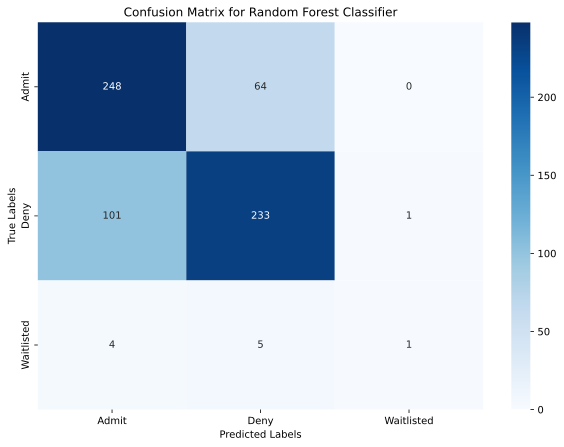

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Labels for your classes
class_labels = ['Admit', 'Deny', 'Waitlisted']

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()
